#  <center> <font color=#0099FF>Etude sur l'eau potable</font>
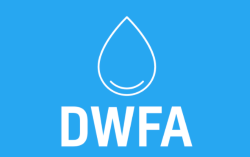


# <font color=#0099FF>Préparation du fichier : table_finale_3</font>

In [1]:
import pandas as pd
import numpy as np

# 1 - population

In [2]:
population = pd.read_csv('Population.csv')
population.head()

,Country,Granularity,Year,Population
0,Afghanistan,Total,2000,20779.953
1,Afghanistan,Male,2000,10689.508
2,Afghanistan,Female,2000,10090.449
3,Afghanistan,Rural,2000,15657.474
4,Afghanistan,Urban,2000,4436.282


In [3]:
population['Population'] = population['Population']*1000
population['Population']= population['Population'].astype("int64")
population.head()
# changement d'unité et de type de la variable unité

,Country,Granularity,Year,Population
0,Afghanistan,Total,2000,20779953
1,Afghanistan,Male,2000,10689508
2,Afghanistan,Female,2000,10090449
3,Afghanistan,Rural,2000,15657474
4,Afghanistan,Urban,2000,4436282


In [4]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20914 entries, 0 to 20913
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      20914 non-null  object
 1   Granularity  20914 non-null  object
 2   Year         20914 non-null  int64 
 3   Population   20914 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 653.7+ KB


In [5]:
population.isna().sum()

Country        0
Granularity    0
Year           0
Population     0
dtype: int64

In [6]:
population.nunique()

Country          239
Granularity        5
Year              19
Population     20514
dtype: int64

In [7]:
population.duplicated().sum()

0

In [8]:
population['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       "Democratic People's Republic

In [9]:
population['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [10]:
population.loc[(population['Granularity']=="Total") & (population['Year']==2018)]['Population'].sum()
# population mondiale bien supérieure à 7 milliards

9090746132

In [11]:
population.loc[(population['Granularity']=="Total") & (population['Country']=='China') & (population['Year']==2018)]['Population'].sum()

1459377612

In [12]:
population.loc[(population['Granularity']=="Total") & (population['Country'].str.contains('China')) & (population['Year']==2018)]['Population'].sum()

2918755224

# 2 - region

In [13]:
region = pd.read_csv('RegionCountry.csv')
region.head()

,REGION (DISPLAY),COUNTRY (DISPLAY)
0,Europe,Albania
1,Europe,Andorra
2,Europe,Armenia
3,Western Pacific,Australia
4,Europe,Austria


In [14]:
region.rename(columns={"REGION (DISPLAY)":"Region", "COUNTRY (DISPLAY)":"Country"}, inplace = True)
region.head()

,Region,Country
0,Europe,Albania
1,Europe,Andorra
2,Europe,Armenia
3,Western Pacific,Australia
4,Europe,Austria


In [15]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Region   194 non-null    object
 1   Country  194 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [16]:
region.isna().sum()

Region     0
Country    0
dtype: int64

In [17]:
region.nunique()

Region       6
Country    194
dtype: int64

In [18]:
liste_pays=region['Country'].unique()
filtre_pays = population['Country'].isin(liste_pays)                                                        
population_selection = population[~filtre_pays]
population_selection['Country'].unique()
# 46 pays sans continent

array(['American Samoa', 'Anguilla', 'Aruba', 'Bermuda',
       'Bonaire, Sint Eustatius and Saba', 'British Virgin Islands',
       'Cayman Islands', 'Channel Islands', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Curaçao', 'Falkland Islands (Malvinas)', 'Faroe Islands',
       'French Guyana', 'French Polynesia', 'Gibraltar', 'Greenland',
       'Guadeloupe', 'Guam', 'Holy See', 'Isle of Man', 'Liechtenstein',
       'Martinique', 'Mayotte', 'Montserrat',
       'Netherlands Antilles (former)', 'New Caledonia',
       'North Macedonia', 'Northern Mariana Islands', 'Palestine',
       'Puerto Rico', 'Réunion', 'Saint Barthélemy',
       'Saint Helena, Ascension and Tristan da Cunha',
       'Saint Pierre and Miquelon', 'Saint-Martin (French part)',
       'Serbia and Montenegro', 'Sint Maarten  (Dutch part)',
       'Sudan (former)', 'Tokelau', 'Turks and Caicos Islands',
       'United States Virgin Islands', 'Wallis and F

In [19]:
region.duplicated().sum()

0

# 3 - Fusion population + region

In [20]:
population_mondiale =pd.merge(population, region, on = 'Country', how = 'left')    
population_mondiale

,Country,Granularity,Year,Population,Region
0,Afghanistan,Total,2000,20779953,Eastern Mediterranean
1,Afghanistan,Male,2000,10689508,Eastern Mediterranean
2,Afghanistan,Female,2000,10090449,Eastern Mediterranean
3,Afghanistan,Rural,2000,15657474,Eastern Mediterranean
4,Afghanistan,Urban,2000,4436282,Eastern Mediterranean
...,...,...,...,...,...
20909,Zimbabwe,Total,2018,14438802,Africa
20910,Zimbabwe,Male,2018,6879119,Africa
20911,Zimbabwe,Female,2018,7559693,Africa
20912,Zimbabwe,Rural,2018,11465748,Africa


In [21]:
population_mondiale.isna().sum()

Country           0
Granularity       0
Year              0
Population        0
Region         3177
dtype: int64

In [22]:
population_mondiale = population_mondiale.dropna()

In [23]:
population_mondiale

,Country,Granularity,Year,Population,Region
0,Afghanistan,Total,2000,20779953,Eastern Mediterranean
1,Afghanistan,Male,2000,10689508,Eastern Mediterranean
2,Afghanistan,Female,2000,10090449,Eastern Mediterranean
3,Afghanistan,Rural,2000,15657474,Eastern Mediterranean
4,Afghanistan,Urban,2000,4436282,Eastern Mediterranean
...,...,...,...,...,...
20909,Zimbabwe,Total,2018,14438802,Africa
20910,Zimbabwe,Male,2018,6879119,Africa
20911,Zimbabwe,Female,2018,7559693,Africa
20912,Zimbabwe,Rural,2018,11465748,Africa


In [24]:
population_mondiale.loc[(population_mondiale['Granularity']=="Total") & (population_mondiale['Year']==2018)]['Population'].sum()
# population mondiale autour de 7,5 milliards

7616339508

In [25]:
population_mondiale['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia

In [26]:
population_mondiale.loc[(population_mondiale['Granularity']=="Total") & (population_mondiale['Country']=="China") & (population_mondiale['Year']==2018)]['Population'].sum()

1459377612

# 4 - stability

In [27]:
stability = pd.read_csv('PoliticalStability.csv')
stability.head()

,Country,Year,Political_Stability,Granularity
0,Afghanistan,2000,-2.44,Total
1,Afghanistan,2002,-2.04,Total
2,Afghanistan,2003,-2.20,Total
3,Afghanistan,2004,-2.30,Total
4,Afghanistan,2005,-2.07,Total


In [28]:
stability.drop(columns=["Granularity"], inplace=True)

In [29]:
stability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              3526 non-null   object 
 1   Year                 3526 non-null   int64  
 2   Political_Stability  3526 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 82.8+ KB


In [30]:
stability.isna().sum()

Country                0
Year                   0
Political_Stability    0
dtype: int64

In [31]:
stability.nunique()

Country                200
Year                    18
Political_Stability    444
dtype: int64

In [32]:
stability['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 

In [33]:
stability['Year'].unique()

array([2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [34]:
filtre_stability = stability['Country'].isin(liste_pays)                                                        
stability_selection = stability[~filtre_stability]
stability_selection['Country'].unique()
# 10 pays absent du df region


array(['American Samoa', 'Bermuda', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Greenland', 'North Macedonia', 'Palestine', 'Puerto Rico'],
      dtype=object)

In [35]:
stability.duplicated().sum()

0

In [36]:
# Il n'y a pas 'China' dans le df stability, 'china, mainland' représentant la chine contientale, je veux utiliser ses valeurs sous l'intitulé 'China'.
stability.loc[stability['Country']=='China, mainland','Country']='China'

In [37]:
stability.loc[stability['Country']=='China']

,Country,Year,Political_Stability
699,China,2000,-0.21
700,China,2002,-0.33
701,China,2003,-0.56
702,China,2004,-0.39
703,China,2005,-0.50
704,China,2006,-0.54
705,China,2007,-0.50
706,China,2008,-0.49
707,China,2009,-0.45
708,China,2010,-0.66


# 5 - Fusion population_mondiale + stability

In [38]:
population_mondiale_finale =pd.merge(population_mondiale, stability, on = ('Country','Year'), how = 'left')    
population_mondiale_finale

,Country,Granularity,Year,Population,Region,Political_Stability
0,Afghanistan,Total,2000,20779953,Eastern Mediterranean,-2.44
1,Afghanistan,Male,2000,10689508,Eastern Mediterranean,-2.44
2,Afghanistan,Female,2000,10090449,Eastern Mediterranean,-2.44
3,Afghanistan,Rural,2000,15657474,Eastern Mediterranean,-2.44
4,Afghanistan,Urban,2000,4436282,Eastern Mediterranean,-2.44
...,...,...,...,...,...,...
17732,Zimbabwe,Total,2018,14438802,Africa,-0.71
17733,Zimbabwe,Male,2018,6879119,Africa,-0.71
17734,Zimbabwe,Female,2018,7559693,Africa,-0.71
17735,Zimbabwe,Rural,2018,11465748,Africa,-0.71


In [39]:
population_mondiale_finale.isna().sum()

Country                   0
Granularity               0
Year                      0
Population                0
Region                    0
Political_Stability    1187
dtype: int64

In [40]:
population_mondiale_finale.loc[population_mondiale_finale['Year']==2001]

,Country,Granularity,Year,Population,Region,Political_Stability
5,Afghanistan,Total,2001,21606988,Eastern Mediterranean,NaN
6,Afghanistan,Male,2001,11117754,Eastern Mediterranean,NaN
7,Afghanistan,Female,2001,10489238,Eastern Mediterranean,NaN
8,Afghanistan,Rural,2001,16318324,Eastern Mediterranean,NaN
9,Afghanistan,Urban,2001,4648139,Eastern Mediterranean,NaN
...,...,...,...,...,...,...
17647,Zimbabwe,Total,2001,11923914,Africa,NaN
17648,Zimbabwe,Male,2001,5812019,Africa,NaN
17649,Zimbabwe,Female,2001,6111887,Africa,NaN
17650,Zimbabwe,Rural,2001,8140630,Africa,NaN


### Remplacement des valeurs de l'année 2001

In [41]:
population_mondiale_finale.loc[population_mondiale_finale['Year']==2003]['Political_Stability'].isna().sum()
# je choisis les valeurs de 2003 car il y a moins de NaN qu'en 2002 (12 pour 42)

12

In [42]:
# Je remplace les valeurs de 2001 par celles de 2003
liste_political_stability=population_mondiale_finale.loc[population_mondiale_finale['Year']==2003]['Political_Stability'].tolist()

In [43]:
population_mondiale_finale.loc[population_mondiale_finale['Year']==2001,'Political_Stability']=liste_political_stability

In [44]:
population_mondiale_finale.isna().sum()

Country                  0
Granularity              0
Year                     0
Population               0
Region                   0
Political_Stability    276
dtype: int64

### Rempacement des valeurs manquantes pour les 12 pays restants

Je remplace par la valeur suivante s'il manque peu de valeur ou par la moyenne dans les autres cas.

In [45]:
population_mondiale_finale_NA= population_mondiale_finale.loc[population_mondiale_finale['Political_Stability'].isnull(),:]
population_mondiale_finale_NA['Country'].unique()

array(['Cook Islands', 'Kiribati', 'Marshall Islands',
       'Micronesia (Federated States of)', 'Monaco', 'Nauru', 'Niue',
       'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Tonga', 'Tuvalu'],
      dtype=object)

In [46]:
population_mondiale_finale.loc[population_mondiale_finale['Country']=='Cook Islands']['Political_Stability'].mean()

1.2300000000000002

In [47]:
population_mondiale_finale.loc[population_mondiale_finale['Country']=='Cook Islands']=population_mondiale_finale.loc[population_mondiale_finale['Country']=='Cook Islands'].fillna('1.23')

In [48]:
population_mondiale_finale.loc[population_mondiale_finale['Country']=='Kiribati']=population_mondiale_finale.loc[population_mondiale_finale['Country']=='Kiribati'].fillna(method='bfill')
population_mondiale_finale.loc[population_mondiale_finale['Country']=='Marshall Islands']=population_mondiale_finale.loc[population_mondiale_finale['Country']=='Marshall Islands'].fillna(method='bfill')
population_mondiale_finale.loc[population_mondiale_finale['Country']=='Micronesia (Federated States of)']=population_mondiale_finale.loc[population_mondiale_finale['Country']=='Micronesia (Federated States of)'].fillna(method='bfill')
population_mondiale_finale.loc[population_mondiale_finale['Country']=='Nauru']=population_mondiale_finale.loc[population_mondiale_finale['Country']=='Nauru'].fillna(method='bfill')
population_mondiale_finale.loc[population_mondiale_finale['Country']=='Monaco']=population_mondiale_finale.loc[population_mondiale_finale['Country']=='Monaco'].fillna(1)
population_mondiale_finale.loc[population_mondiale_finale['Country']=='Palau']=population_mondiale_finale.loc[population_mondiale_finale['Country']=='Palau'].fillna(method='bfill')
population_mondiale_finale.loc[population_mondiale_finale['Country']=='Saint Kitts and Nevis']=population_mondiale_finale.loc[population_mondiale_finale['Country']=='Saint Kitts and Nevis'].fillna(method='bfill')
population_mondiale_finale.loc[population_mondiale_finale['Country']=='San Marino']=population_mondiale_finale.loc[population_mondiale_finale['Country']=='San Marino'].fillna(1)
population_mondiale_finale.loc[population_mondiale_finale['Country']=='Tonga']=population_mondiale_finale.loc[population_mondiale_finale['Country']=='Tonga'].fillna(method='bfill')
population_mondiale_finale.loc[population_mondiale_finale['Country']=='Tuvalu']=population_mondiale_finale.loc[population_mondiale_finale['Country']=='Tuvalu'].fillna(method='bfill')

In [49]:
population_mondiale_finale.loc[population_mondiale_finale['Country']=='Niue']['Political_Stability'].mean()

1.2300000000000002

In [50]:
population_mondiale_finale.loc[population_mondiale_finale['Country']=='Niue']=population_mondiale_finale.loc[population_mondiale_finale['Country']=='Niue'].fillna(1.23)

In [51]:
population_mondiale_finale.isna().sum()

Country                0
Granularity            0
Year                   0
Population             0
Region                 0
Political_Stability    0
dtype: int64

# 6 - mortality

In [52]:
mortality = pd.read_csv('MortalityRateAttributedToWater.csv')
mortality.head()

,Year,Country,Granularity,Mortality rate attributed to exposure to unsafe WASH services,WASH deaths
0,2016,Afghanistan,Female,15.31193,NaN
1,2016,Afghanistan,Male,12.61297,NaN
2,2016,Afghanistan,Total,13.92067,4824.353
3,2016,Albania,Female,0.12552,NaN
4,2016,Albania,Male,0.20650,NaN


In [53]:
mortality.rename(columns = {'Mortality rate attributed to exposure to unsafe WASH services':'Mortality WASH services rate, per 100000 people'}, inplace=True)
mortality.head()

,Year,Country,Granularity,"Mortality WASH services rate, per 100000 people",WASH deaths
0,2016,Afghanistan,Female,15.31193,NaN
1,2016,Afghanistan,Male,12.61297,NaN
2,2016,Afghanistan,Total,13.92067,4824.353
3,2016,Albania,Female,0.12552,NaN
4,2016,Albania,Male,0.20650,NaN


In [54]:
mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Year                                             549 non-null    int64  
 1   Country                                          549 non-null    object 
 2   Granularity                                      549 non-null    object 
 3   Mortality WASH services rate, per 100000 people  549 non-null    float64
 4   WASH deaths                                      183 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 21.6+ KB


In [55]:
mortality.isna().sum()
# 366 valeurs manquantes sur le nombre de décès

Year                                                 0
Country                                              0
Granularity                                          0
Mortality WASH services rate, per 100000 people      0
WASH deaths                                        366
dtype: int64

In [56]:
mortality_NA = mortality.loc[mortality['WASH deaths'].isna()==True]
mortality_NA.head()

,Year,Country,Granularity,"Mortality WASH services rate, per 100000 people",WASH deaths
0,2016,Afghanistan,Female,15.31193,NaN
1,2016,Afghanistan,Male,12.61297,NaN
3,2016,Albania,Female,0.12552,NaN
4,2016,Albania,Male,0.20650,NaN
6,2016,Algeria,Female,2.19890,NaN


In [57]:
mortality_NA['Country'].nunique()
# pour chaque pays, il y a le nombre de mort total mais pas les valeurs par genre

183

In [58]:
mortality.nunique()

Year                                                 1
Country                                            183
Granularity                                          3
Mortality WASH services rate, per 100000 people    548
WASH deaths                                        183
dtype: int64

In [59]:
mortality['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gree

In [60]:
mortality['Year'].unique()

array([2016], dtype=int64)

In [61]:
liste_mortality = mortality['Country'].unique()
filtre_mortality = region['Country'].isin(liste_mortality)                                                        
mortality_manque = region[~filtre_mortality]
mortality_manque['Country'].unique()
# 11 pays manquants /194 cités dans df region

array(['Andorra', 'Monaco', 'Niue', 'San Marino', 'Tuvalu',
       'Cook Islands', 'Dominica', 'Marshall Islands', 'Nauru', 'Palau',
       'Saint Kitts and Nevis'], dtype=object)

In [62]:
set(region['Country']).difference(set(mortality['Country']))

{'Andorra',
 'Cook Islands',
 'Dominica',
 'Marshall Islands',
 'Monaco',
 'Nauru',
 'Niue',
 'Palau',
 'Saint Kitts and Nevis',
 'San Marino',
 'Tuvalu'}

# 7- Fusion population_mondiale_finale + mortality

In [63]:
population_mondiale_finale_mortality =pd.merge(population_mondiale_finale, mortality, on = ('Country','Year','Granularity'), how = 'left')    
population_mondiale_finale_mortality.loc[population_mondiale_finale_mortality['Year']==2016]

,Country,Granularity,Year,Population,Region,Political_Stability,"Mortality WASH services rate, per 100000 people",WASH deaths
80,Afghanistan,Total,2016,35383032,Eastern Mediterranean,-2.67,13.92067,4824.353
81,Afghanistan,Male,2016,18186994,Eastern Mediterranean,-2.67,12.61297,NaN
82,Afghanistan,Female,2016,17196034,Eastern Mediterranean,-2.67,15.31193,NaN
83,Afghanistan,Rural,2016,25985093,Eastern Mediterranean,-2.67,NaN,NaN
84,Afghanistan,Urban,2016,8670939,Eastern Mediterranean,-2.67,NaN,NaN
...,...,...,...,...,...,...,...,...
17722,Zimbabwe,Total,2016,14030331,Africa,-0.62,24.55074,3965.033
17723,Zimbabwe,Male,2016,6674206,Africa,-0.62,27.06688,NaN
17724,Zimbabwe,Female,2016,7356132,Africa,-0.62,22.16388,NaN
17725,Zimbabwe,Rural,2016,10934468,Africa,-0.62,NaN,NaN


# 8 - water

In [64]:
water = pd.read_csv('BasicAndSafelyManagedDrinkingWaterServices.csv')
water.head()

,Year,Country,Granularity,Population using at least basic drinking-water services (%),Population using safely managed drinking-water services (%)
0,2000,Afghanistan,Rural,21.61913,NaN
1,2000,Afghanistan,Total,27.77190,NaN
2,2000,Afghanistan,Urban,49.48745,NaN
3,2000,Albania,Rural,81.78472,NaN
4,2000,Albania,Total,87.86662,49.29324


In [65]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 5 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Year                                                         10476 non-null  int64  
 1   Country                                                      10476 non-null  object 
 2   Granularity                                                  10476 non-null  object 
 3   Population using at least basic drinking-water services (%)  9415 non-null   float64
 4   Population using safely managed drinking-water services (%)  3286 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 409.3+ KB


In [66]:
water.isna().sum()

Year                                                              0
Country                                                           0
Granularity                                                       0
Population using at least basic drinking-water services (%)    1061
Population using safely managed drinking-water services (%)    7190
dtype: int64

In [67]:
water.nunique()

Year                                                             18
Country                                                         194
Granularity                                                       3
Population using at least basic drinking-water services (%)    7704
Population using safely managed drinking-water services (%)    2877
dtype: int64

In [68]:
water['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia

In [69]:
water['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

### Population using safely managed drinking-water services (%)

In [70]:
water_safely_pays_NA = water.loc[water['Population using safely managed drinking-water services (%)'].isna()==True]
water_safely_pays_NA['Country'].unique()
# il manque des données dans 162 pays sur 194

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Comoros',
       'Cook Islands', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',


In [71]:
water_safely_pays_granularity = water.loc[(water['Population using safely managed drinking-water services (%)'].isna()==False) & (water['Granularity']=='Total')]
water_safely_pays_granularity['Country'].nunique()
# 34 pays renseignés pour rural
# 52 pays renseignés sur urban
# 98 pays renseignés pour total

98

In [72]:
water_safely_pays_granularity_NA = water.loc[(water['Population using safely managed drinking-water services (%)'].isna()==True) & (water['Granularity']=='Total')]
water_safely_pays_granularity_NA['Country'].nunique()
# 160 pays non renseignés pour rural
# 144 pays non renseignés sur urban
# 101 pays non renseignés pour total

101

### Population using basic drinking-water services (%)

In [73]:
water_basic_pays_NA = water.loc[water['Population using at least basic drinking-water services (%)'].isna()==True]
water_basic_pays_NA['Country'].unique()
# il manque des données dans 39 pays

array(['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados',
       'Brunei Darussalam', 'Cook Islands', 'Dominica', 'Grenada',
       'Japan', 'Kiribati', 'Kuwait', 'Lebanon', 'Libya',
       'Marshall Islands', 'Micronesia (Federated States of)', 'Monaco',
       'Montenegro', 'Nauru', 'Niue', 'Oman', 'Poland', 'Qatar',
       'Republic of Korea', 'Saint Kitts and Nevis',
       'Saint Vincent and the Grenadines', 'San Marino', 'Saudi Arabia',
       'Seychelles', 'Singapore', 'South Sudan', 'Timor-Leste',
       'Trinidad and Tobago', 'Tuvalu', 'United Arab Emirates',
       'United States of America', 'Venezuela (Bolivarian Republic of)',
       'Argentina', 'Central African Republic', 'Eritrea'], dtype=object)

In [74]:
water_basic_pays_granularity_NA = water.loc[(water['Population using at least basic drinking-water services (%)'].isna()==True)& (water['Granularity']=='Total')]
water_basic_pays_granularity_NA['Country'].unique()
# 39 pays non renseignés pour rural
# 34 pays non renseignés sur urban
# 14 pays non renseignés pour total

array(['Marshall Islands', 'Montenegro', 'Oman', 'Poland',
       'Republic of Korea', 'South Sudan', 'Timor-Leste', 'Tuvalu',
       'United States of America', 'Saint Kitts and Nevis', 'Dominica',
       'Argentina', 'Central African Republic', 'Eritrea'], dtype=object)

In [75]:
water_basic_pays_granularity_NA = water.loc[(water['Population using at least basic drinking-water services (%)'].isna()==False) & (water['Granularity']=='Total')]
water_basic_pays_granularity_NA['Country'].nunique()
# 166 pays renseignés pour rural
# 169 pays renseignés sur urban
# 194 pays renseignés pour total

194

### bilan des valeurs manquantes

In [76]:
data=np.array([[ 34,  160,  166,  39],
               [ 52,  144,  169,  34],
               [ 98, 101, 194, 14]])

In [77]:
columns = ['Safely','Safely_Na','Basic','Basic_Na']
index = ['Rural','Urban','Total']

In [78]:
water_bilan = pd.DataFrame(data=data,index=index,columns=columns)
water_bilan
# beaucoup de valeurs manquantes sur 'Safely managed water' et quelques années manquantes sur 'Basic driking water'

,Safely,Safely_Na,Basic,Basic_Na
Rural,34,160,166,39
Urban,52,144,169,34
Total,98,101,194,14


### Remplacement des valeurs manquantes pour 'Population using at least basic drinking-water services (%)', Granularity = Total (14pays)

Ainsi nous aurons une vision d'ensemble d'accès à l'eau.

In [79]:
water.loc[(water['Country']=='United States of America') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='United States of America') & (water['Granularity']=='Total')].fillna(method='bfill')
water.loc[(water['Country']=='Marshall Islands') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Marshall Islands') & (water['Granularity']=='Total')].fillna(method='bfill')
water.loc[(water['Country']=='Montenegro') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Montenegro') & (water['Granularity']=='Total')].fillna(method='bfill')
water.loc[(water['Country']=='Oman') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Oman') & (water['Granularity']=='Total')].fillna(method='bfill')
water.loc[(water['Country']=='Poland') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Poland') & (water['Granularity']=='Total')].fillna(method='bfill')
water.loc[(water['Country']=='Republic of Korea') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Republic of Korea') & (water['Granularity']=='Total')].fillna(method='bfill')
water.loc[(water['Country']=='South Sudan') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='South Sudan') & (water['Granularity']=='Total')].fillna(method='bfill')
water.loc[(water['Country']=='Timor-Leste') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Timor-Leste') & (water['Granularity']=='Total')].fillna(method='bfill')
water.loc[(water['Country']=='Tuvalu') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Tuvalu') & (water['Granularity']=='Total')].fillna(method='bfill')
water.loc[(water['Country']=='Saint Kitts and Nevis') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Saint Kitts and Nevis') & (water['Granularity']=='Total')].fillna(method='bfill')
water.loc[(water['Country']=='Dominica') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Dominica') & (water['Granularity']=='Total')].fillna(method='bfill')
water.loc[(water['Country']=='Argentina') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Argentina') & (water['Granularity']=='Total')].fillna(method='bfill')
water.loc[(water['Country']=='Central African Republic') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Central African Republic') & (water['Granularity']=='Total')].fillna(method='bfill')
water.loc[(water['Country']=='Eritrea') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Eritrea') & (water['Granularity']=='Total')].fillna(method='bfill')

In [80]:
water_basic_pays_granularity_NA = water.loc[(water['Population using at least basic drinking-water services (%)'].isna()==True)& (water['Granularity']=='Total')]
water_basic_pays_granularity_NA['Country'].unique()

array(['Saint Kitts and Nevis', 'Dominica', 'Argentina',
       'Central African Republic', 'Eritrea'], dtype=object)

In [81]:
water.loc[(water['Country']=='Saint Kitts and Nevis') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Saint Kitts and Nevis') & (water['Granularity']=='Total')].fillna(method='ffill')
water.loc[(water['Country']=='Dominica') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Dominica') & (water['Granularity']=='Total')].fillna(method='ffill')
water.loc[(water['Country']=='Argentina') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Argentina') & (water['Granularity']=='Total')].fillna(method='ffill')
water.loc[(water['Country']=='Central African Republic') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Central African Republic') & (water['Granularity']=='Total')].fillna(method='ffill')
water.loc[(water['Country']=='Eritrea') & (water['Granularity']=='Total')]=water.loc[(water['Country']=='Eritrea') & (water['Granularity']=='Total')].fillna(method='ffill')

In [82]:
water_basic_pays_granularity_NA = water.loc[(water['Population using at least basic drinking-water services (%)'].isna()==True)& (water['Granularity']=='Total')]
water_basic_pays_granularity_NA['Country'].nunique()

0

# 9 - Fusion population_mondiale_finale_mortality et water

In [83]:
table_finale =pd.merge(population_mondiale_finale_mortality, water, on = ('Country','Year','Granularity'), how = 'left')    
table_finale

,Country,Granularity,Year,Population,Region,Political_Stability,"Mortality WASH services rate, per 100000 people",WASH deaths,Population using at least basic drinking-water services (%),Population using safely managed drinking-water services (%)
0,Afghanistan,Total,2000,20779953,Eastern Mediterranean,-2.44,NaN,NaN,27.77190,NaN
1,Afghanistan,Male,2000,10689508,Eastern Mediterranean,-2.44,NaN,NaN,NaN,NaN
2,Afghanistan,Female,2000,10090449,Eastern Mediterranean,-2.44,NaN,NaN,NaN,NaN
3,Afghanistan,Rural,2000,15657474,Eastern Mediterranean,-2.44,NaN,NaN,21.61913,NaN
4,Afghanistan,Urban,2000,4436282,Eastern Mediterranean,-2.44,NaN,NaN,49.48745,NaN
...,...,...,...,...,...,...,...,...,...,...
17732,Zimbabwe,Total,2018,14438802,Africa,-0.71,NaN,NaN,NaN,NaN
17733,Zimbabwe,Male,2018,6879119,Africa,-0.71,NaN,NaN,NaN,NaN
17734,Zimbabwe,Female,2018,7559693,Africa,-0.71,NaN,NaN,NaN,NaN
17735,Zimbabwe,Rural,2018,11465748,Africa,-0.71,NaN,NaN,NaN,NaN


In [84]:
table_finale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17737 entries, 0 to 17736
Data columns (total 10 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Country                                                      17737 non-null  object 
 1   Granularity                                                  17737 non-null  object 
 2   Year                                                         17737 non-null  int64  
 3   Population                                                   17737 non-null  int64  
 4   Region                                                       17737 non-null  object 
 5   Political_Stability                                          17737 non-null  object 
 6   Mortality WASH services rate, per 100000 people              546 non-null    float64
 7   WASH deaths                                                  182 non-null   

In [85]:
table_finale['Political_Stability'] = pd.to_numeric(table_finale['Political_Stability'])    

In [86]:
table_finale.loc[(table_finale['Country']=='United States of America') & (table_finale['Granularity']=='Total')]

,Country,Granularity,Year,Population,Region,Political_Stability,"Mortality WASH services rate, per 100000 people",WASH deaths,Population using at least basic drinking-water services (%),Population using safely managed drinking-water services (%)
16882,United States of America,Total,2000,281710909,Americas,1.08,NaN,NaN,99.20959,98.94233
16887,United States of America,Total,2001,284607993,Americas,0.08,NaN,NaN,99.20959,98.94233
16892,United States of America,Total,2002,287279318,Americas,0.29,NaN,NaN,99.20959,98.94233
16897,United States of America,Total,2003,289815562,Americas,0.08,NaN,NaN,99.20959,98.94233
16902,United States of America,Total,2004,292354658,Americas,-0.23,NaN,NaN,99.20959,98.94233
16907,United States of America,Total,2005,294993511,Americas,-0.06,NaN,NaN,99.20959,98.94233
16912,United States of America,Total,2006,297758969,Americas,0.49,NaN,NaN,99.21437,98.94711
16917,United States of America,Total,2007,300608429,Americas,0.38,NaN,NaN,99.21913,98.95185
16922,United States of America,Total,2008,303486012,Americas,0.59,NaN,NaN,99.22386,98.95657
16927,United States of America,Total,2009,306307567,Americas,0.45,NaN,NaN,99.22856,98.96126


In [87]:
table_finale.loc[(table_finale['Population using at least basic drinking-water services (%)'].isna()==True)& (table_finale['Granularity']=='Total')]

,Country,Granularity,Year,Population,Region,Political_Stability,"Mortality WASH services rate, per 100000 people",WASH deaths,Population using at least basic drinking-water services (%),Population using safely managed drinking-water services (%)
90,Afghanistan,Total,2018,37171921,Eastern Mediterranean,-2.75,NaN,NaN,NaN,NaN
185,Albania,Total,2018,2882740,Europe,0.38,NaN,NaN,NaN,NaN
280,Algeria,Total,2018,42228408,Africa,-0.79,NaN,NaN,NaN,NaN
339,Andorra,Total,2018,77006,Europe,1.43,NaN,NaN,NaN,NaN
432,Angola,Total,2018,30809787,Africa,-0.32,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
17352,Venezuela (Bolivarian Republic of),Total,2018,28887118,Americas,-1.34,NaN,NaN,NaN,NaN
17447,Viet Nam,Total,2018,95545962,Western Pacific,0.20,NaN,NaN,NaN,NaN
17542,Yemen,Total,2018,28498683,Eastern Mediterranean,-3.00,NaN,NaN,NaN,NaN
17637,Zambia,Total,2018,17351708,Africa,0.14,NaN,NaN,NaN,NaN


# 10 - Export de la table

In [88]:
table_finale_3=table_finale

In [89]:
from pathlib import Path  
filepath = Path('C:/Users/carls/OneDrive/Bureau/table/table_finale_3.csv')  
table_finale_3.to_csv(filepath,index = False)  